<a href="https://colab.research.google.com/github/aerehn/DTEK0086/blob/main/App5_Sleep_stage_classification_using_electromyography_and_electro_oculography_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DTEK0086 Biosignal Analytics
#Sleep stage classification using electromyography and electro-oculography

#Background
Sleep can be dividedinto distinct categories, including rapid eye movement (REM) sleep and non-rapid eye movement (NREM) sleep. In REM sleep, the eyes move rapidly from side to side, breathing becomes faster and irregular, and heart rate and blood pressure increase to near waking levels [1].  REM sleep is essential for healthy emotion regulation. NREM sleep consists of light 
sleep and deep sleep. Both light and deep sleep are essential for various 
processesin the body. The sleep stages can be measured using the polysomnography
method, containing electromyography(EMG), electrooculography(EOG), and electroencephalography. Facial EMG shows differences between the sleep stages. EOG is a technique to collect the electrical activity of the eye’s muscles. It 
can also be used to track eye movements.

##Objective
The objective of this project is toperform sleep stage classification leveraging features derived from EOG and EMG signals. Using machine learning, you need to differentiate the records into three classes: i.e., awake, REM, and NREM. The analysis should be done in Python(more details in the Instruction Section). 

For this course project, you need to:
1. Submit your Python scriptand your report of the observations, graphs, and conclusions made upon analyzing the given signals. It is suggested to submit a Jupyter Notebookfile, including your code and report. 
2. Give a 20-minute presentation about your work. Your presentation should includea description of 
  - The problem and the biosignals.
  - The steps in your analysis: e.g., what pre-processing methods you use, which features you extract, which machine-learning algorithms you use.
  - The results that you obtain: e.g., the accuracy of two machine learning methods
  - Your evaluation and conclusion on the findings and methods

##Data collection setup
The single-channel EOG was measured from the left side of the face
(referenced to the contralateral ear lobe). The single-channel EMG was collected from the chin. The signals were measured in microvolts with the 
sampling frequency of 200 Hz. The data annotations were performed by human experts. The data is extracted from the Physionets You Snooze You Win challenge database (challenge-2018)

##Structure of the data
The project includes the records of 100 subjects (i.e., 80 for training and 20 for test). There are 4-9 records for each subject.
Each record (i.e., file) consists of one minute of EOG and EMG signals, and it corresponds to the awake, REM, or NREM stage. The dataset includes separate “Train” and “Test” folders. The folders contain three subfolders as “awake”, “rem”, and “nonrem.” Each record is saved as a CSV file, including two columns corresponding to the EOG and EMG signals. The filename includes the event number
and the subject number. For example, 100 is the event number, 
and 61 is the subject number in “100_subj_61.csv.”

##Instruction
For the analysis, you should:
1. Use pre-processing techniques (such as filtering) if necessary.
2. Extract relevant time-domain and frequency-domain features from the EOG and EMGsignals (e.g., summary statistics, RMS value, and resonance frequency).
3. Standardize your data: i.e., use the mean and standard deviation of the training data to standardize the training data and the test data.
4. Select two supervised machine learning algorithms and train two classifiers using the training set. Each classifier should predict 0 for “awake”, 1 for “rem”, or 2 for “nonrem”.
5. Compare the two classifiers by evaluating the results using the test set. 
  - Obtain the confusion matrix, accuracy, precision, recall, and F1-score. These can be calculated from the predicted and true values. Hint: You can utilize packages such as scipy, tsfresh, and tsfel for the pre-processing and feature-extraction steps, and packages such as scikit-learn for the machine-
learning step.





In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sample_length_in_seconds=60

In [ ]:
#Mounting on drive
#jos tulee ongelmia niin lisää omaan driveen nuo datat
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
main_path = "/content/gdrive/My Drive/Colabdata/DataDTEK0086"
train_paths=["/Train"]
!ls "/content/gdrive/My Drive/Colabdata/DataDTEK0086/Train"

awake  nonrem  rem


In [ ]:
train_paths={"awake":"/content/gdrive/My Drive/Colabdata/DataDTEK0086/Train/awake","nonrem":"/content/gdrive/My Drive/Colabdata/DataDTEK0086/Train/nonrem", "rem":"/content/gdrive/My Drive/Colabdata/DataDTEK0086/Train/rem"}
print(os.listdir(train_paths["awake"]))

['105_subj_63.csv', '0_subj_50.csv', '149_subj_22.csv', '0_subj_57.csv', '332_subj_4.csv', '143_subj_75.csv', '204_subj_66.csv', '48_subj_16.csv', '97_subj_55.csv', '0_subj_71.csv', '0_subj_21.csv', '60_subj_28.csv', '39_subj_94.csv', '0_subj_34.csv', '200_subj_32.csv', '170_subj_95.csv', '279_subj_47.csv', '202_subj_13.csv', '0_subj_43.csv', '269_subj_83.csv', '346_subj_82.csv', '0_subj_59.csv', '17_subj_80.csv', '207_subj_64.csv', '256_subj_99.csv', '310_subj_2.csv', '0_subj_49.csv', '91_subj_91.csv', '145_subj_70.csv', '4_subj_74.csv', '489_subj_65.csv', '12_subj_96.csv', '4_subj_52.csv', '214_subj_22.csv', '2_subj_67.csv', '0_subj_58.csv', '20_subj_61.csv', '0_subj_15.csv', '307_subj_83.csv', '0_subj_16.csv', '0_subj_69.csv', '166_subj_88.csv', '239_subj_13.csv', '175_subj_93.csv', '103_subj_55.csv', '267_subj_81.csv', '28_subj_2.csv', '54_subj_28.csv', '4_subj_94.csv', '329_subj_72.csv', '28_subj_48.csv', '17_subj_1.csv', '0_subj_28.csv', '234_subj_81.csv', '34_subj_26.csv', '554_

Collecting data of subject 01.

In [ ]:
subject1_files={"awake":[],"nonrem":[],"rem":[]}

subject2_files={"awake":[],"nonrem":[],"rem":[]}

for sleep_state in train_paths.keys():
  files = os.listdir(train_paths[sleep_state])
  for filename in files:
    if "subj_1.csv" in filename:
      subject1_files[sleep_state].append(filename)
    if "subj_2.csv" in filename:
      subject2_files[sleep_state].append(filename)


In [ ]:
rem_data = pd.read_csv(train_paths["rem"]+"/"+subject1_files["rem"][0])
rem_data2= pd.read_csv(train_paths["rem"]+"/"+subject2_files["rem"][1])

nonrem_data=pd.read_csv(train_paths["nonrem"]+"/"+subject1_files["nonrem"][1])
nonrem_data2=pd.read_csv(train_paths["nonrem"]+"/"+subject2_files["nonrem"][1])
awake_data=pd.read_csv(train_paths["awake"]+"/"+subject1_files["awake"][0])
awake_data2=pd.read_csv(train_paths["awake"]+"/"+subject2_files["awake"][0])

In [ ]:
print(rem_data2["emg"][12000])

nan


In [ ]:
def draw_figure_from_raw_data(sequence, title, fs=200, xlim=(0,2),ylim=(-10,10)):
  data=sequence[0:-1]
  fs=len(data)/sample_length_in_seconds
  dt=1/fs
  t = np.arange(0,60,dt)
  fig, axs = plt.subplots()
  fig.set_size_inches(18.5, 10.5)
  axs.set_title(title)
  axs.plot(t, data, color='C0')
  axs.set_xlabel("Time")
  axs.set_ylabel("Amplitude")
  plt.xlim([xlim[0], xlim[1]]);
  plt.ylim([ylim[0], ylim[1]])
  plt.show()

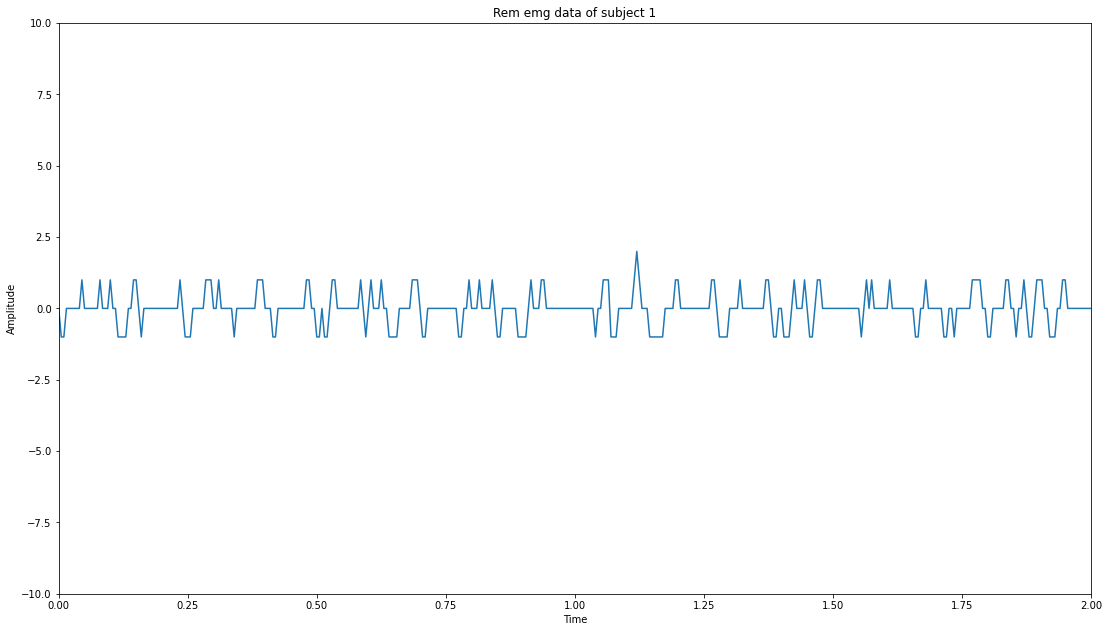

In [ ]:
draw_figure_from_raw_data(rem_data["emg"], "Rem emg data of subject 1", xlim=(0,2))

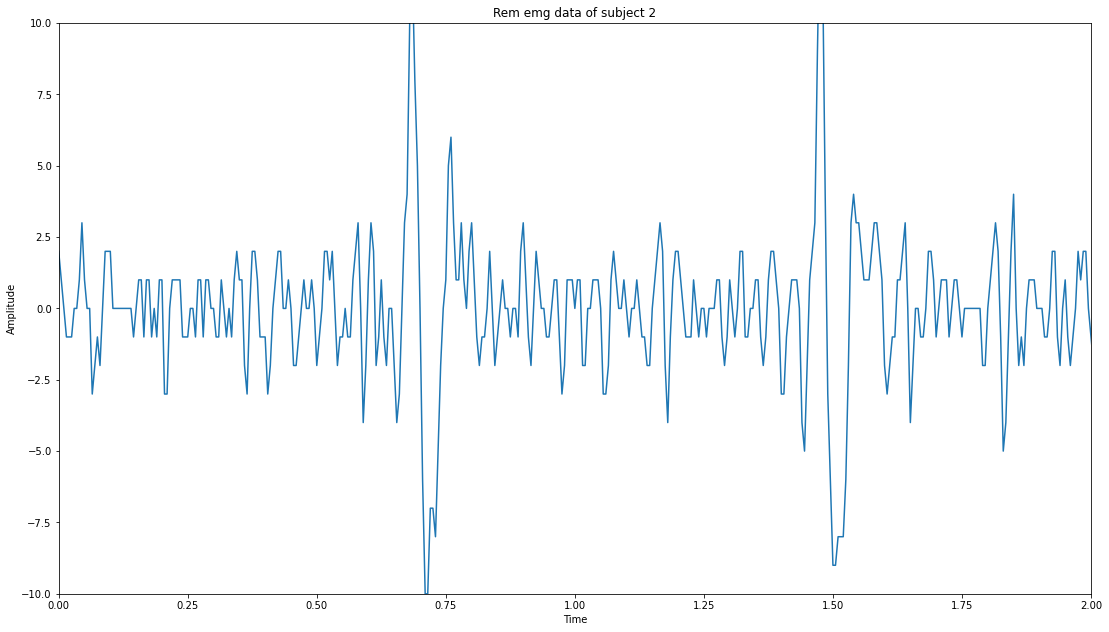

In [ ]:
draw_figure_from_raw_data(rem_data2["emg"], "Rem emg data of subject 2",xlim=(0,2))

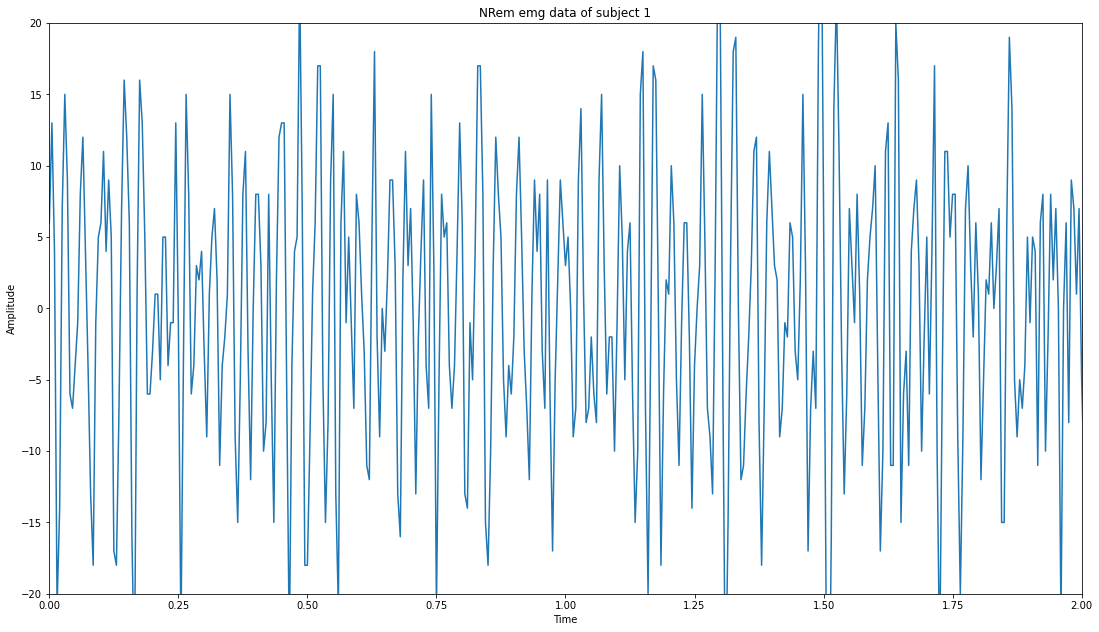

In [ ]:
draw_figure_from_raw_data(nonrem_data["emg"], "NRem emg data of subject 1",ylim=(-20,20))

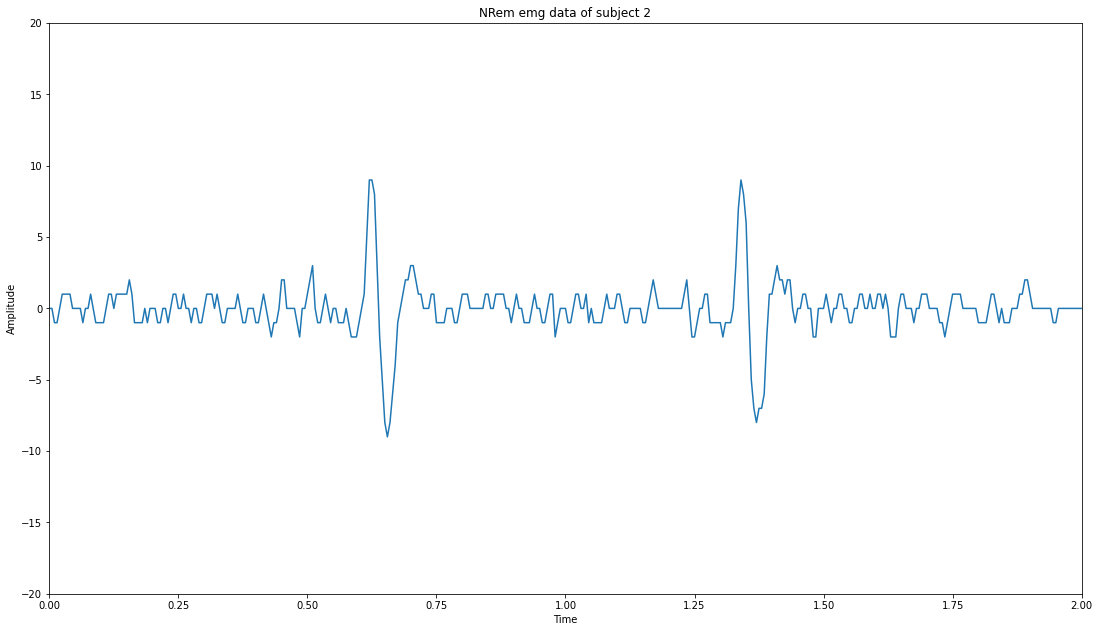

In [ ]:
draw_figure_from_raw_data(nonrem_data2["emg"], "NRem emg data of subject 2",ylim=(-20,20))

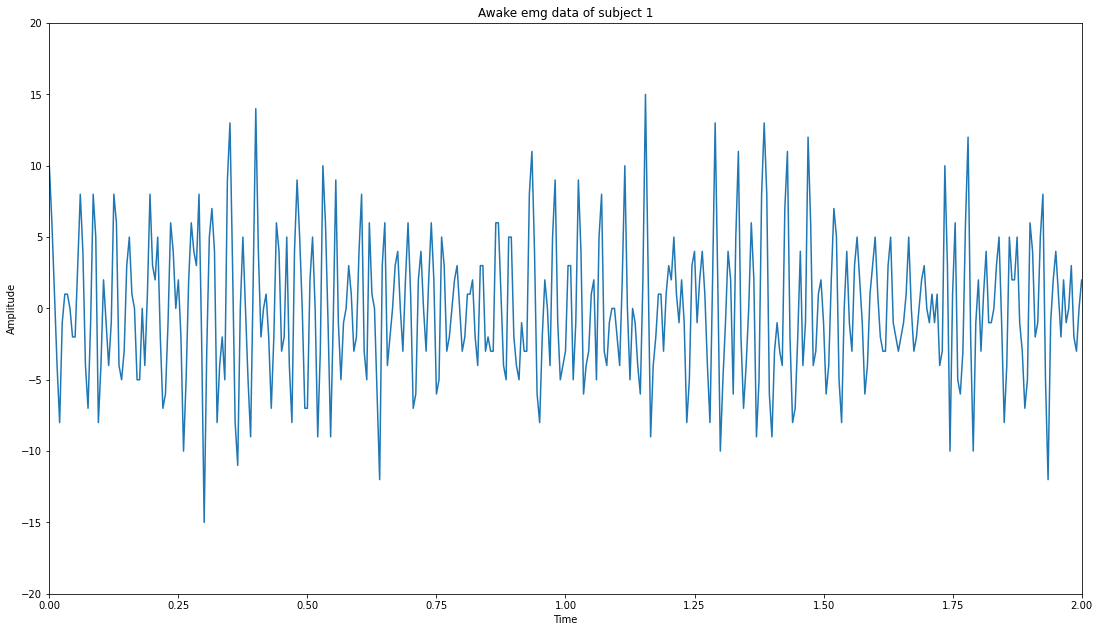

In [ ]:
draw_figure_from_raw_data(awake_data["emg"], "Awake emg data of subject 1",ylim=(-20,20))

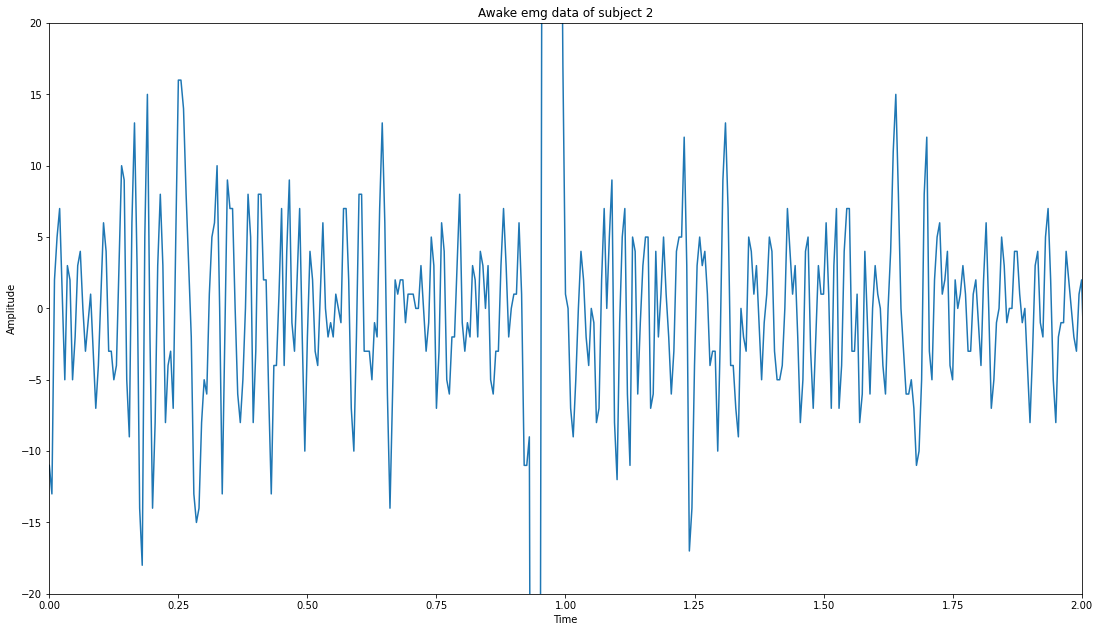

In [ ]:
draw_figure_from_raw_data(awake_data2["emg"], "Awake emg data of subject 2",ylim=(-20,20))

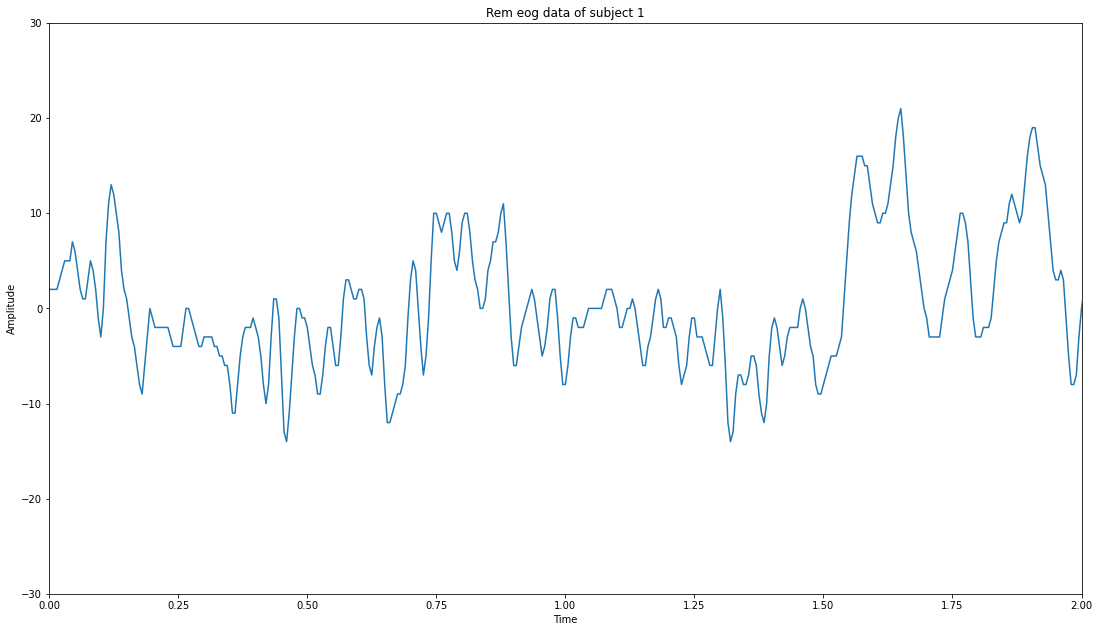

In [ ]:
draw_figure_from_raw_data(rem_data["eog"], "Rem eog data of subject 1",ylim=(-30,30))

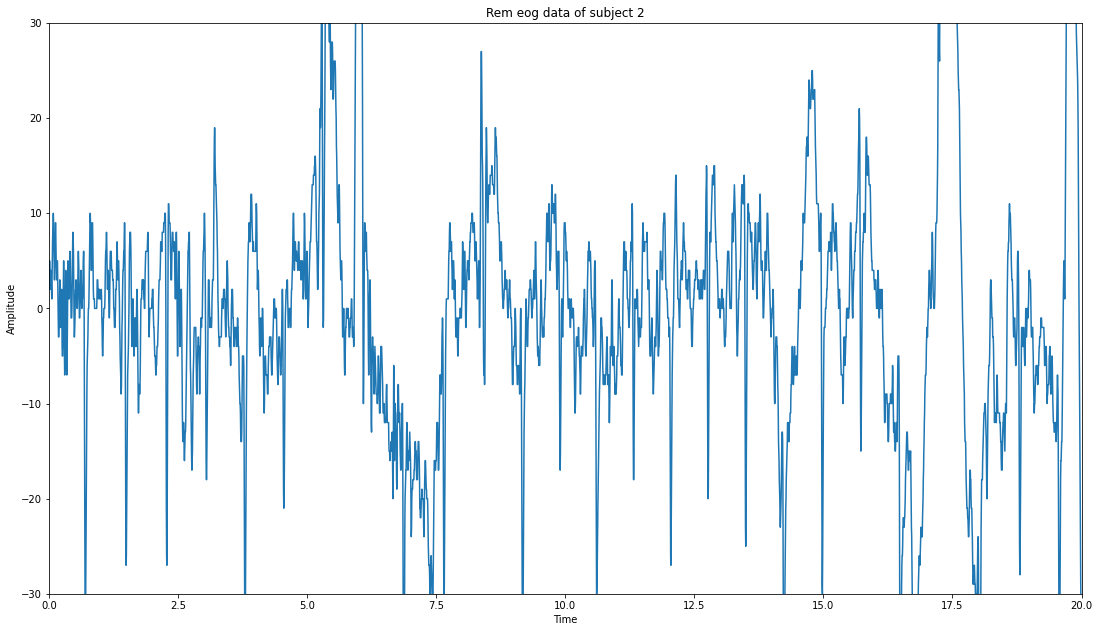

In [ ]:
draw_figure_from_raw_data(rem_data2["eog"], "Rem eog data of subject 2",xlim=(0,20),ylim=(-30,30))

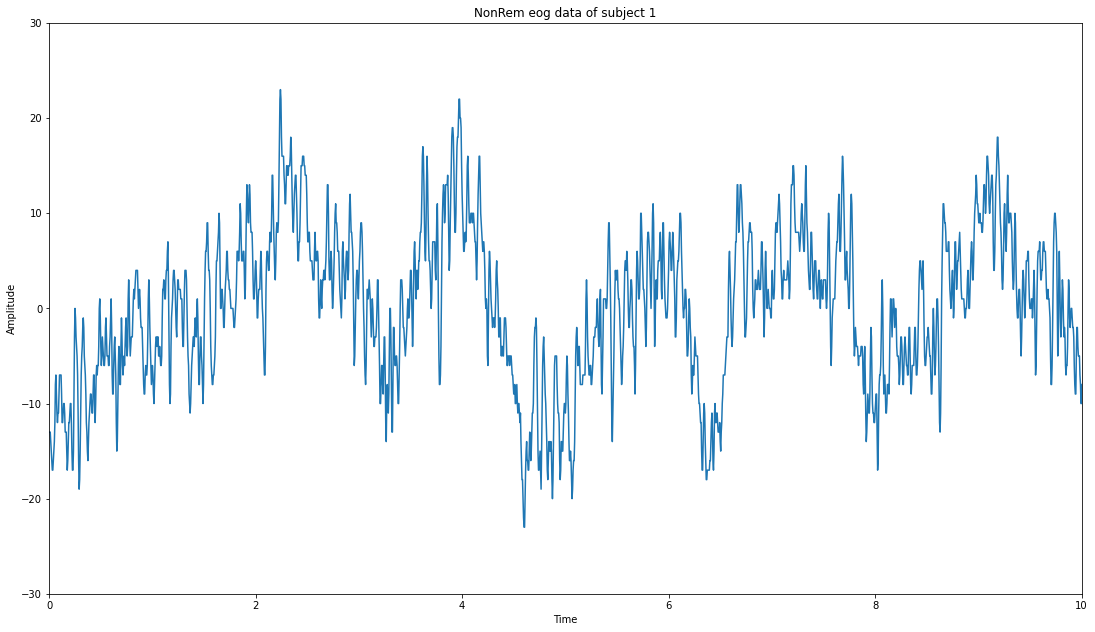

In [ ]:
draw_figure_from_raw_data(nonrem_data["eog"], "NonRem eog data of subject 1",xlim=(0,10),ylim=(-30,30))

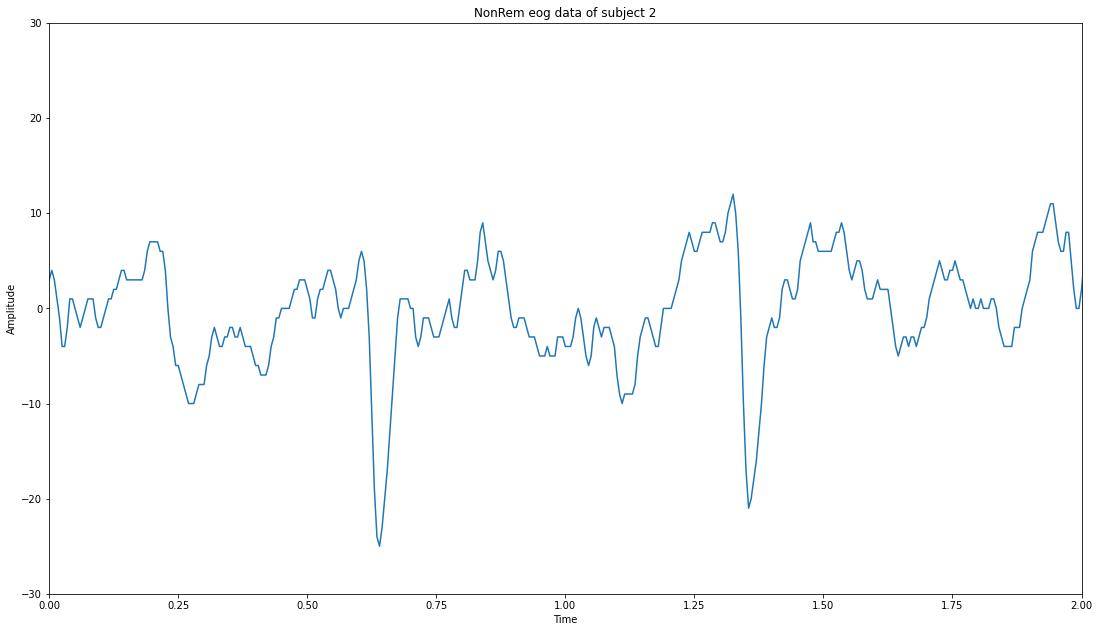

In [ ]:
draw_figure_from_raw_data(nonrem_data2["eog"], "NonRem eog data of subject 2",ylim=(-30,30))

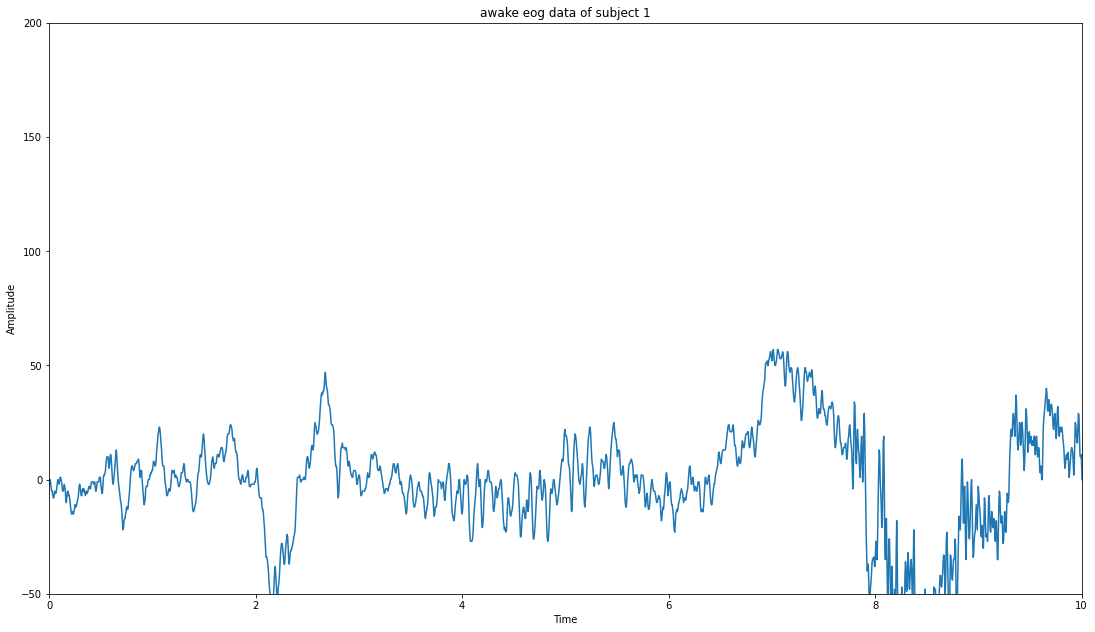

In [ ]:
draw_figure_from_raw_data(awake_data["eog"], "awake eog data of subject 1",xlim=(0,10),ylim=(-50,200))

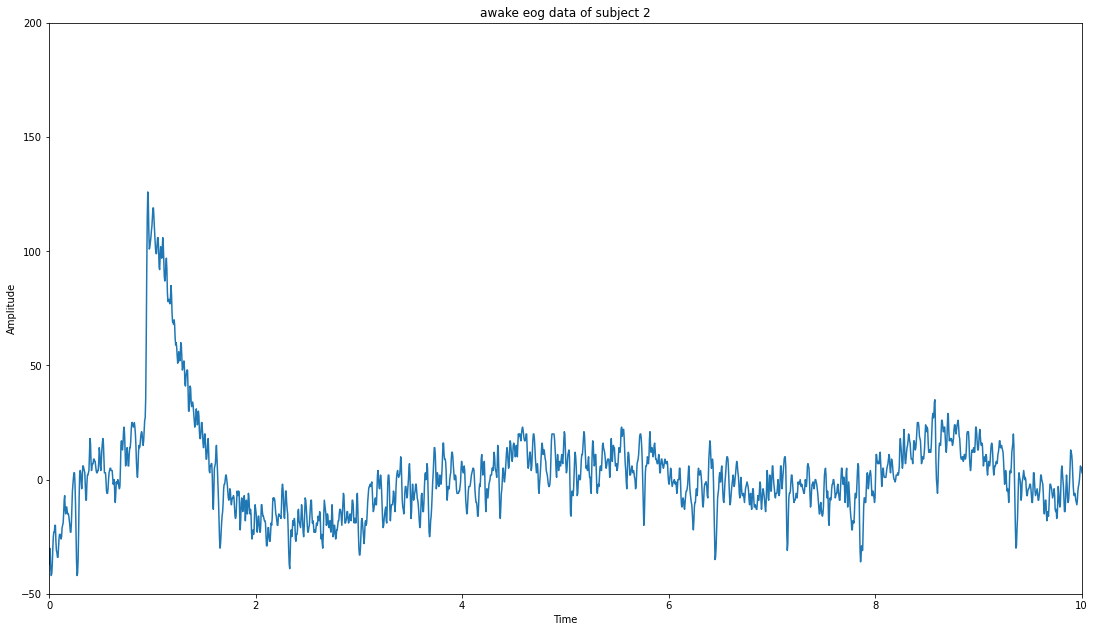

In [ ]:
draw_figure_from_raw_data(awake_data2["eog"], "awake eog data of subject 2",xlim=(0,10),ylim=(-50,200))

#Frequency domain inspection of the signals

Possible sources of noise:
* Ambient noise such as powerline interference
* ECG artifacts
* Motion artifacts i.e breathing and such



In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np

In [ ]:

def plot_fourier_transform(data, title, fs=200,xlim=(-100,100),ylim=(-10,1000)):
  data=np.array(data[0:-1])
  N=len(data)
  yf = fft(data)
  #xf = fftfreq(N, 1 / fs)[:N//2]
  xf = fftfreq(N, 1 / fs)
  fig, axs = plt.subplots()
  fig.set_size_inches(18.5, 10.5)
  axs.set_title(title)
  #axs.plot(xf, 2/N*np.abs(yf[0:N//2]), color='C0')
  axs.plot(xf, 2/N*np.abs(yf), color='C0')
  axs.set_xlabel("Frequency")
  axs.set_ylabel("Amplitude")
  plt.xlim([xlim[0], xlim[1]]);
  plt.ylim([ylim[0], ylim[1]])
  plt.show()

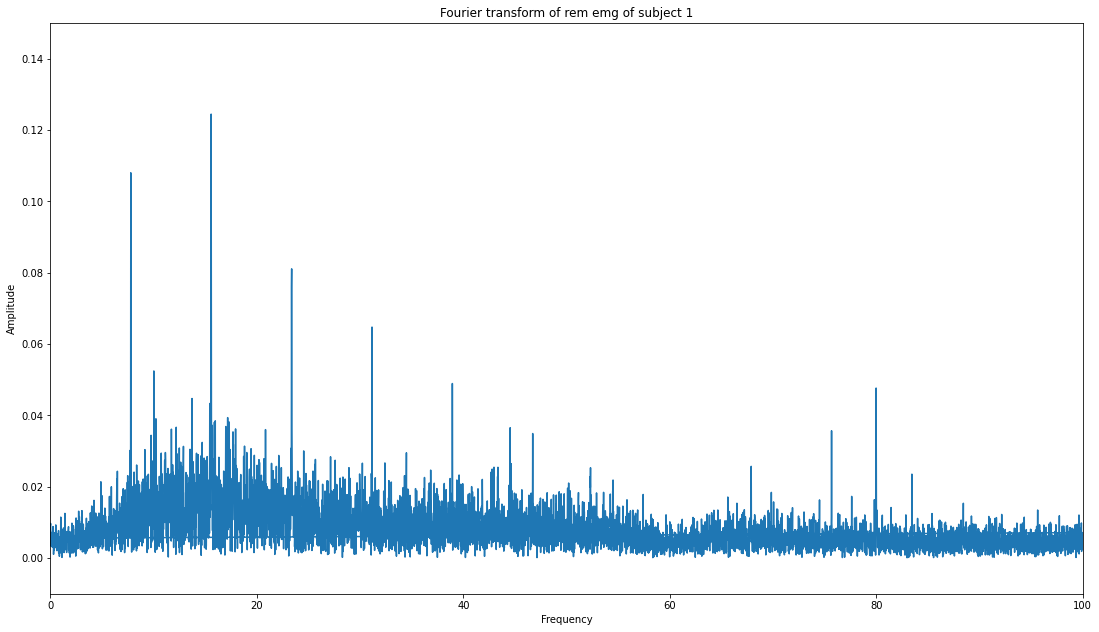

In [ ]:
plot_fourier_transform(rem_data["emg"], "Fourier transform of rem emg of subject 1", fs=200,xlim=(0,100),ylim=(-0.01,0.15))

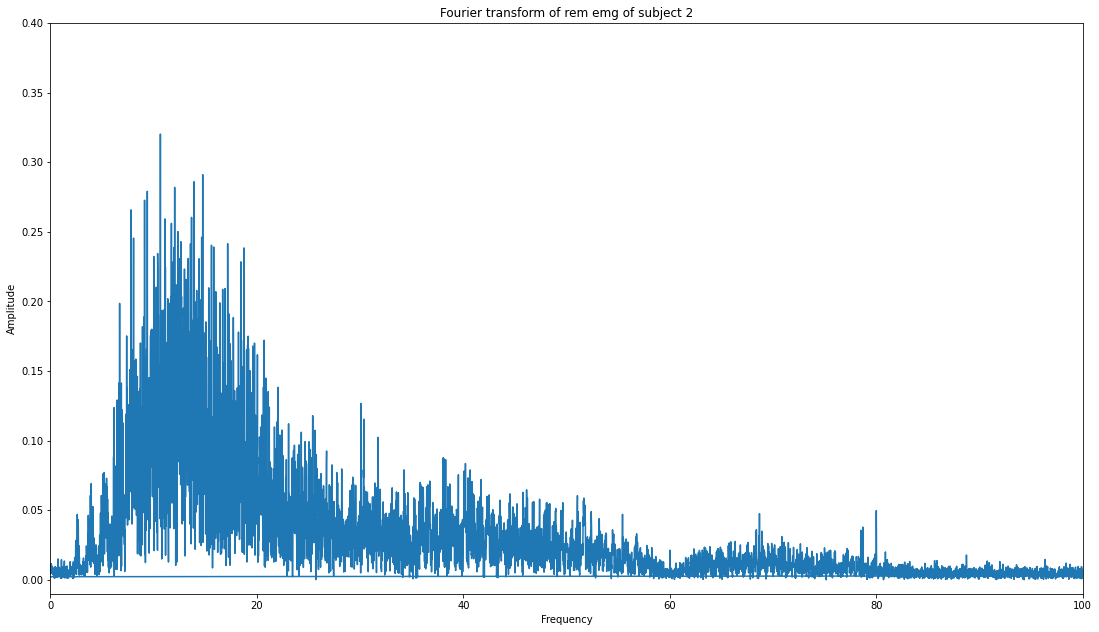

In [ ]:
plot_fourier_transform(rem_data2["emg"], "Fourier transform of rem emg of subject 2", fs=200,xlim=(0,100),ylim=(-0.01,0.4))

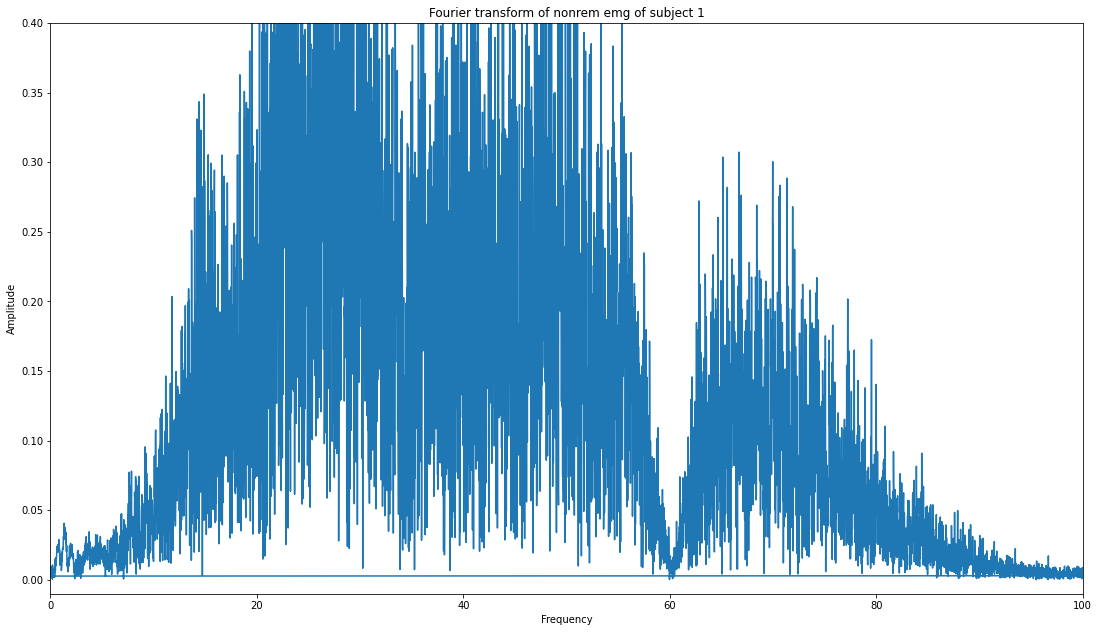

In [ ]:
plot_fourier_transform(nonrem_data["emg"], "Fourier transform of nonrem emg of subject 1", fs=200,xlim=(0,100),ylim=(-0.01,0.4))

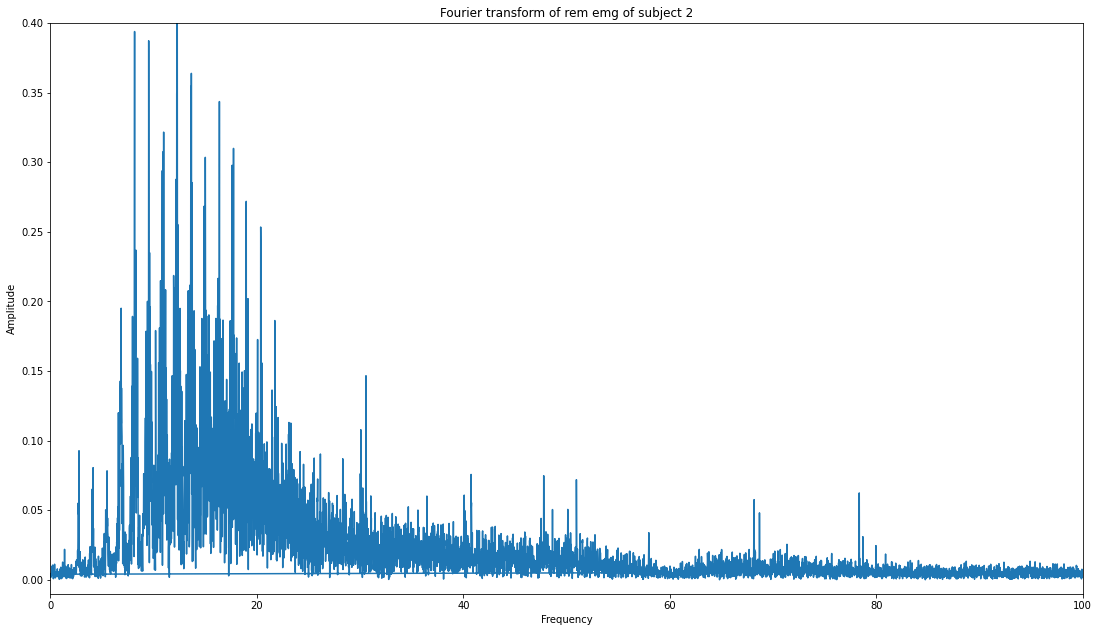

In [ ]:
plot_fourier_transform(nonrem_data2["emg"], "Fourier transform of rem emg of subject 2", fs=200,xlim=(0,100),ylim=(-0.01,0.4))

##EOG Rem vs. Nonrem frequency inspection

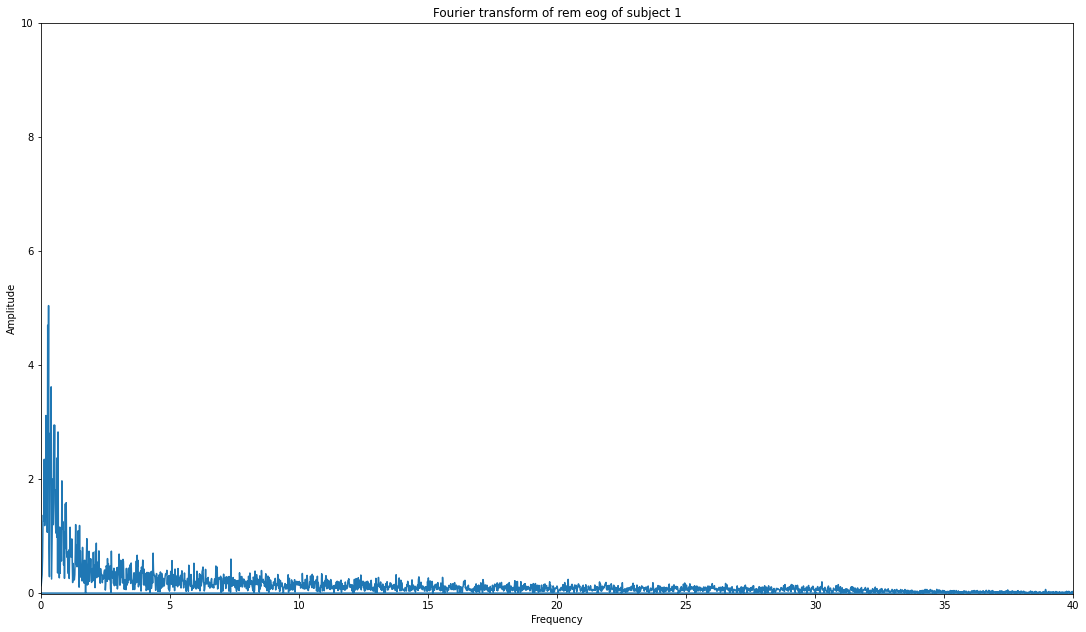

In [ ]:
plot_fourier_transform(rem_data["eog"], "Fourier transform of rem eog of subject 1", fs=200,xlim=(0,40),ylim=(-0.01,10))

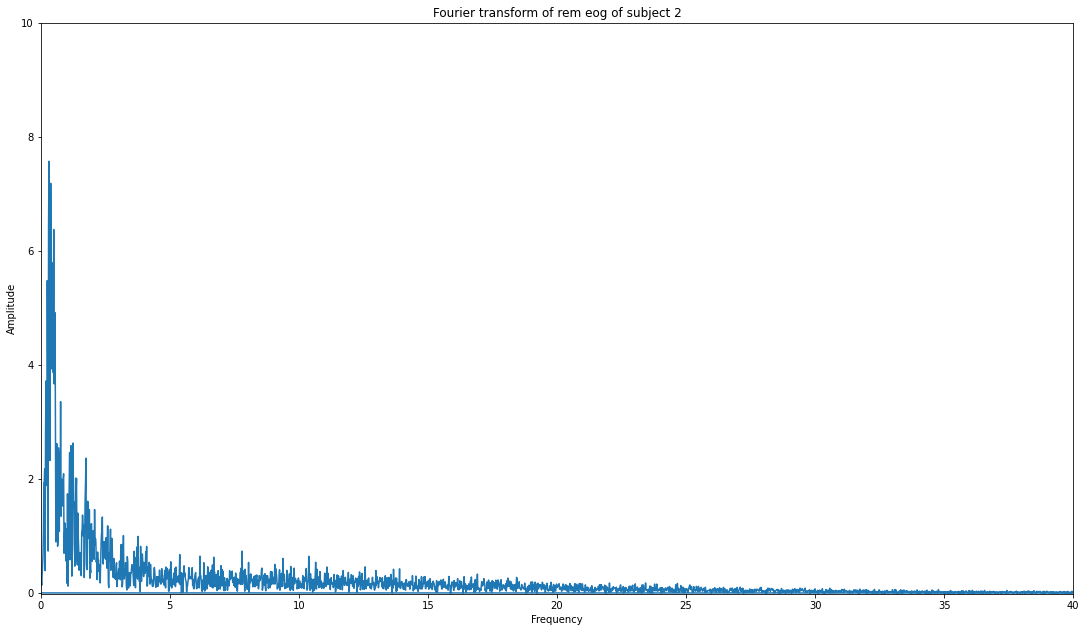

In [ ]:
plot_fourier_transform(rem_data2["eog"], "Fourier transform of rem eog of subject 2", fs=200,xlim=(0,40),ylim=(-0.01,10))

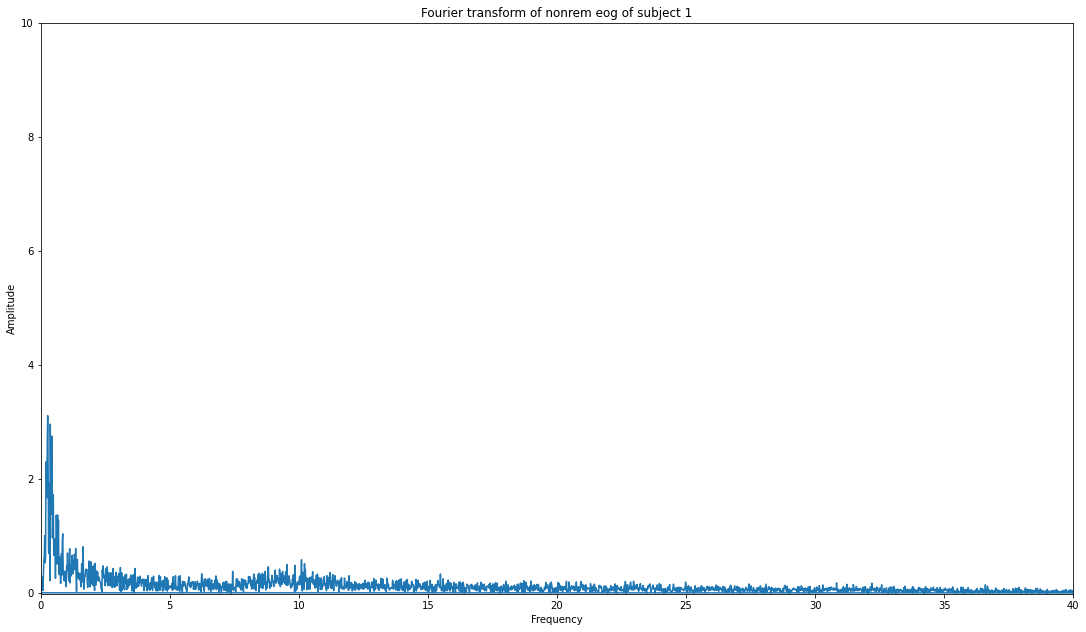

In [ ]:
plot_fourier_transform(nonrem_data["eog"], "Fourier transform of nonrem eog of subject 1", fs=200,xlim=(0,40),ylim=(-0.01,10))

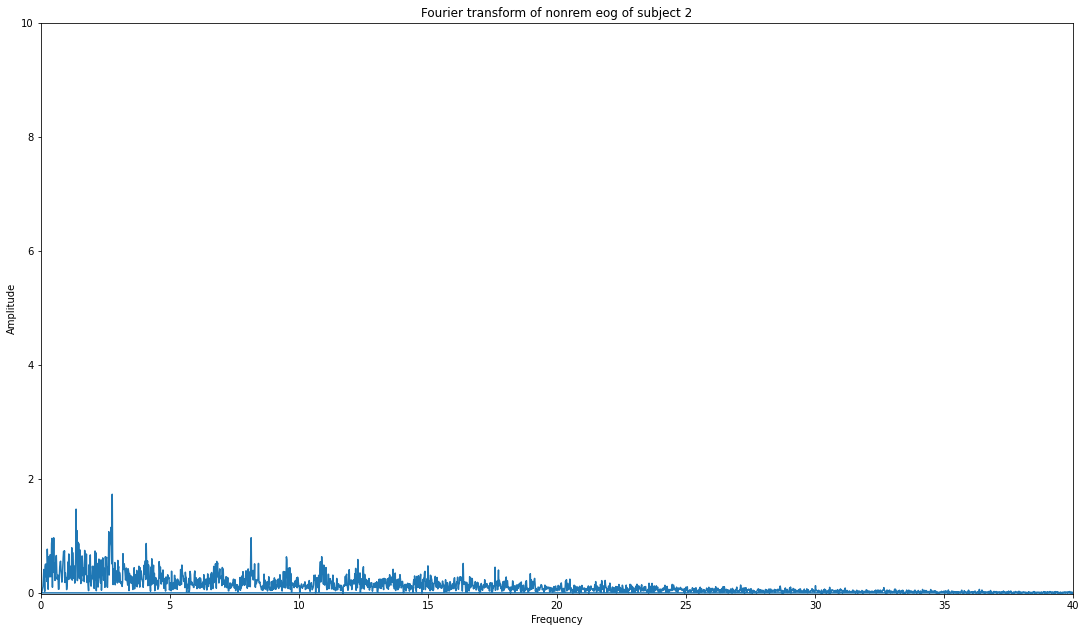

In [ ]:
plot_fourier_transform(nonrem_data2["eog"], "Fourier transform of nonrem eog of subject 2", fs=200,xlim=(0,40),ylim=(-0.01,10))

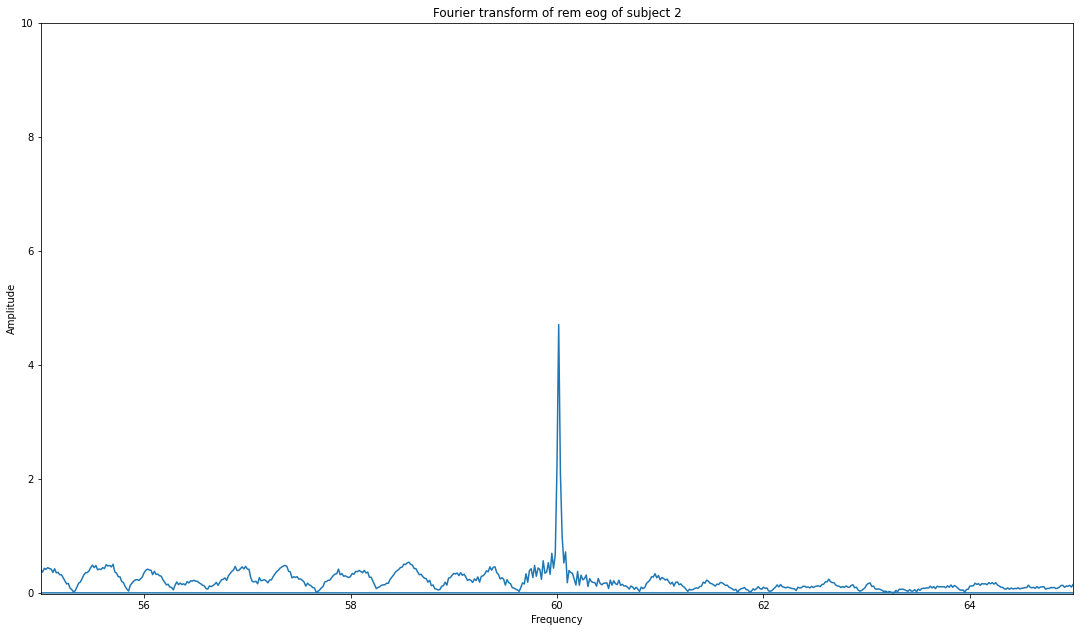

In [ ]:
plot_fourier_transform(awake_data2["eog"], "Fourier transform of rem eog of subject 2", fs=200,xlim=(55,65),ylim=(-0.01,10))

#Discovered noise types
##EMG:
* ECG interference
* white noise

##EOG:
* We can see a powerline interference affecting the eog signal. There is a spike in frequency domain at 60Hz.
* We can also see that the eog is affected by the ECG signal since there is a signal component causing distortions every second or so.

#Conclusions
There appears to be disrepancies in the data:
In emg samples the frequency component at 60 Hz has been flattened leading to a conclusion that the emg data has been filtered with 60Hz notch filter.

The same will have to be done to the EOG samples.